In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Intelligent Systems/Decision Trees"
!pwd
!ls

/content/drive/My Drive/Intelligent Systems/Decision Trees
/content/drive/My Drive/Intelligent Systems/Decision Trees
'Copia de algorithms cheat sheet.png'
'Copia de Cristal Scar Zones.gsheet'
'Copia de Decision Trees.ipynb'
'Copia de decission tree.png'
'Copia de Decission Trees.gdoc'
'Copia de GeronAurelien_2017_Chapter6DecisionTrees_HandsOnMachineLearnin.pdf'
'Copia de real tree.png'
'Copia de tennis.jpg'
'Copia de Tree Worksheet.gsheet'
'Heart Analysis'
 heart_failure.data
 HeartForest
 heart.pdf
 heart_tree
 heart_tree_cool
 heart_tree_cool.png
'Heart Tree Forest.ipynb'
 heart_tree.png


In [3]:
import pandas as pd
import numpy as np
hearts = pd.read_csv('heart_failure.data',header=0)
names = hearts.columns[:-1].values
heart = hearts.to_numpy()
X = heart[:, :-1]
y = heart[:, 12:]

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
accuracy = 0
for i in np.arange(0.15,0.31,0.01):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=1)
  for n in range(4,12):
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = n)
    tree_clf.fit(x_train,y_train) 
    pred_death = tree_clf.predict(x_test)
    accuracy_pred = metrics.accuracy_score(y_test, pred_death)
    #print("Current i is:",i,"current max_depth is:",n,"with an accuracy of:", accuracy_pred)
    if accuracy_pred > accuracy:
      accuracy = accuracy_pred
      best_n = n
      best_i = i
print("The best value for test size is:",best_i,"\nThe best value for max_depth is:",best_n,"with an accuracy of:", accuracy)

The best value for test size is: 0.21000000000000005 
The best value for max_depth is: 6 with an accuracy of: 0.9365079365079365


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=1)
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 6)
tree_clf.fit(x_train,y_train)
pred_death = tree_clf.predict(x_test)
accuracy=accuracy*100
print("The accuracy is: {:.2f}%".format(accuracy))
print("tree classiefier configuration")
print(tree_clf)

The accuracy is: 93.65%
tree classiefier configuration
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


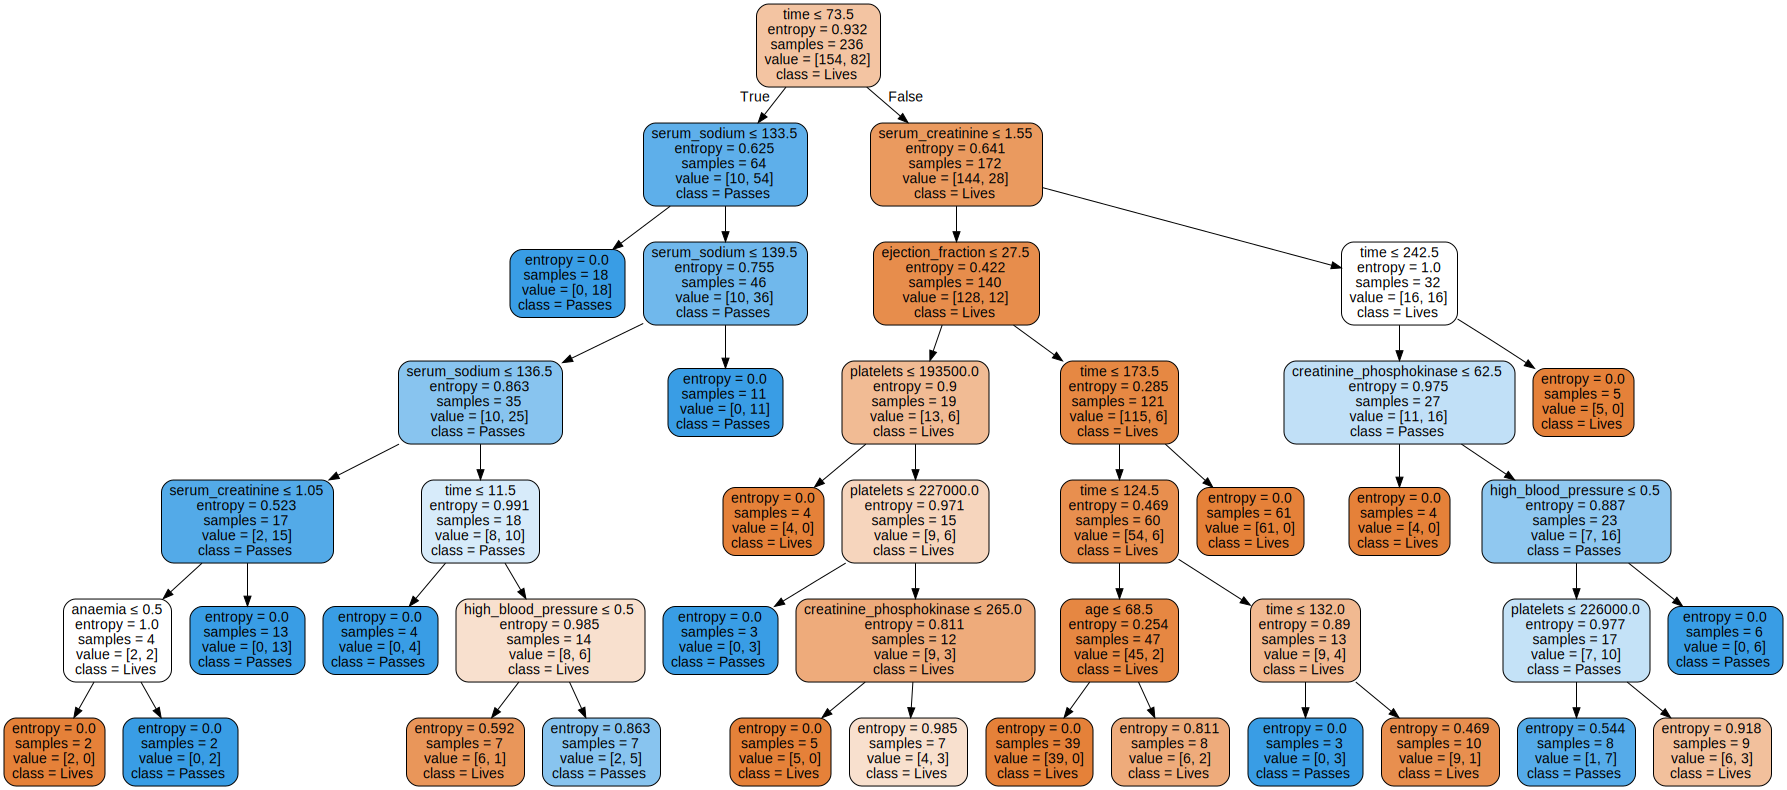

In [6]:
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(tree_clf, out_file=None, 
                           feature_names=names,
                           class_names=['Lives', 'Passes'],
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot, format="png") 
graph.render("heart_tree_cool")
graph

In [7]:
#predict with data
probs = tree_clf.predict_proba([[70,0,69,0,27,0,293000,1.5,136,0,0,170]])
print("probability of class for query",[[70,0,69,0,27,0,293000,1.5,136,0,0,170]],probs*100)

pred =  tree_clf.predict([[70,0,69,0,27,0,293000,1.5,136,0,0,170]])
print("prediction of class for query",[[70,0,69,0,27,0,293000,1.5,136,0,0,170]],pred)

probability of class for query [[70, 0, 69, 0, 27, 0, 293000, 1.5, 136, 0, 0, 170]] [[100.   0.]]
prediction of class for query [[70, 0, 69, 0, 27, 0, 293000, 1.5, 136, 0, 0, 170]] [0.]


In [8]:
age = int(input("What's the age of the patient?: "))
anaemia = int(input("Does the patient have anaemia?\n0)No 1)Yes: "))
cpp = int(input("What's the CPP level?: "))
diabetes = int(input("Does the patient have diabetes?\n0)No 1)Yes: "))
ef = int(input("What's the ejection fraction percentage?: "))
hbp = int(input("Does the patient have high blood pressure?\n0)No 1)Yes: "))
platelets = int(input("What's the platelets amount?: "))
sc = float(input("What's the SC level?: "))
ss = int(input("What's the SS level?: "))
sex = int(input("What's the patient's sex?\n0)Female 1)Male: "))
smoke = int(input("Does the patient smoke?\n0)No 1)Yes: "))
time = int(input("How many days ago did the patient suffer the incident?: "))


probs = tree_clf.predict_proba([[age,anaemia,cpp,diabetes,ef,hbp,platelets,sc,ss,sex,smoke,time]])
print("probability of class for query",[[age,anaemia,cpp,diabetes,ef,hbp,platelets,sc,ss,sex,smoke,time]],probs*100)

pred =  tree_clf.predict([[age,anaemia,cpp,diabetes,ef,hbp,platelets,sc,ss,sex,smoke,time]])
print("prediction of class for query",[[age,anaemia,cpp,diabetes,ef,hbp,platelets,sc,ss,sex,smoke,time]],pred)


What's the age of the patient?: 70
Does the patient have anaemia?
0)No 1)Yes: 0
What's the CPP level?: 69
Does the patient have diabetes?
0)No 1)Yes: 0
What's the ejection fraction percentage?: 27
Does the patient have high blood pressure?
0)No 1)Yes: 0
What's the platelets amount?: 293000
What's the SC level?: 1.5
What's the SS level?: 136
What's the patient's sex?
0)Female 1)Male: 0
Does the patient smoke?
0)No 1)Yes: 0
How many days ago did the patient suffer the incident?: 170
probability of class for query [[70, 0, 69, 0, 27, 0, 293000, 1.5, 136, 0, 0, 170]] [[100.   0.]]
prediction of class for query [[70, 0, 69, 0, 27, 0, 293000, 1.5, 136, 0, 0, 170]] [0.]


In [9]:
#Forest
from sklearn.ensemble import RandomForestClassifier
#n_estimators=485, max_leaf_nodes=13, n_jobs=-1, random_state=10

accuracy = 0
for i in range(0,201):
  rnd_clf = RandomForestClassifier( criterion='entropy',n_estimators=500, max_leaf_nodes=13, n_jobs=-1, random_state=i)
  rnd_clf.fit(x_train, y_train)
  pred_death = rnd_clf.predict(x_test)
  accuracy_pred = metrics.accuracy_score(y_test, pred_death)
  if accuracy_pred > accuracy:
    accuracy = accuracy_pred
    best_i = i
print("The best value for rndmstate is:",best_i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

The best value for rndmstate is: 63


In [12]:
rnd_clf = RandomForestClassifier( criterion='entropy',n_estimators=500, max_leaf_nodes=13, n_jobs=-1, random_state=63)
rnd_clf.fit(x_train, y_train)
pred_death = rnd_clf.predict(x_test)
accuracy_pred = metrics.accuracy_score(y_test, pred_death)
print("random forest", accuracy_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


random forest 0.9523809523809523
